<center>
    <h2 style="color:green;">Project: Refrigerator Price Prediction</h2>
</center>

<h3> Group : 4 (AMS-C)</h3>
<h3> Members: </h3><br>
1. Run Sovannet , ID: e20200741<br>
2. Teng Chansopanha  , ID: e20201711<br>
3. Thy Nary  , ID: e2020265<br>
4. Yit BunVanthana , ID: e20200625<br>
5. Seng Phanarith  , ID: e2020639<br>


## Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

### 1. Load data and check Dimensions of the Data

In [2]:
df = pd.read_csv('Fridgeall.csv')

In [3]:
df

,Unnamed: 0,Title,Price,Description,Shop Location,Duration,Brand
0,0,LSK BF,185.0,years warranty Free delivery in Phnom Penh Tel...,Phnom Penh,15 minutes ago,LSK
1,2,SANDEN INTERCOOL,290.0,Telegram,Phnom Penh,1 hour ago,SANDEN
2,3,SAMSUNG RT,500.0,telegram,Phnom Penh,1 hour ago,SAMSUNG
3,4,LUCK BIRD BC,135.0,telegram,Phnom Penh,1 hour ago,LUCK
4,5,SANDEN,520.0,telegram Cal,Phnom Penh,1 hour ago,SANDEN
...,...,...,...,...,...,...,...
311,342,PANASONIC AUTOMATIC FREEZER,100.0,Still good nothing problem Fast to get freeze ...,Phnom Penh,26-May-2023,PANASONIC
312,343,GENERAL ELECTRIC FREEZER,250.0,General Electric freezers,Phnom Penh,26-May-2023,GENERAL
313,344,HITACHI INVERTER,330.0,HiTACHI Inverter ECO,Phnom Penh,26-May-2023,HITACHI
314,345,PANASONIC INVERTER,370.0,Panasonic Inverter ECO,Phnom Penh,26-May-2023,PANASONIC


In [4]:
df = df.drop(['Unnamed: 0','Duration'], axis=1)
df

,Title,Price,Description,Shop Location,Brand
0,LSK BF,185.0,years warranty Free delivery in Phnom Penh Tel...,Phnom Penh,LSK
1,SANDEN INTERCOOL,290.0,Telegram,Phnom Penh,SANDEN
2,SAMSUNG RT,500.0,telegram,Phnom Penh,SAMSUNG
3,LUCK BIRD BC,135.0,telegram,Phnom Penh,LUCK
4,SANDEN,520.0,telegram Cal,Phnom Penh,SANDEN
...,...,...,...,...,...
311,PANASONIC AUTOMATIC FREEZER,100.0,Still good nothing problem Fast to get freeze ...,Phnom Penh,PANASONIC
312,GENERAL ELECTRIC FREEZER,250.0,General Electric freezers,Phnom Penh,GENERAL
313,HITACHI INVERTER,330.0,HiTACHI Inverter ECO,Phnom Penh,HITACHI
314,PANASONIC INVERTER,370.0,Panasonic Inverter ECO,Phnom Penh,PANASONIC


In [5]:
df.shape

(316, 5)

### 2. Checking the basic information of dataset

In [6]:
# check some information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          316 non-null    object 
 1   Price          316 non-null    float64
 2   Description    316 non-null    object 
 3   Shop Location  316 non-null    object 
 4   Brand          316 non-null    object 
dtypes: float64(1), object(4)
memory usage: 12.5+ KB


#### Observation
1. From above output we can observe that **4 categorical** & **1 numerical** variables.


### 3. Checking NaN values of dataset

In [7]:
# Check some information
df.isnull().sum()

Title            0
Price            0
Description      0
Shop Location    0
Brand            0
dtype: int64

#### Observation
> We have observe that **6** features are not contain missing value

### 4. Showing Only Categorical Features

In [8]:
df_categorical = df.select_dtypes(include='object')
df_categorical.head(5)

,Title,Description,Shop Location,Brand
0,LSK BF,years warranty Free delivery in Phnom Penh Tel...,Phnom Penh,LSK
1,SANDEN INTERCOOL,Telegram,Phnom Penh,SANDEN
2,SAMSUNG RT,telegram,Phnom Penh,SAMSUNG
3,LUCK BIRD BC,telegram,Phnom Penh,LUCK
4,SANDEN,telegram Cal,Phnom Penh,SANDEN


### 5. Showing the Numerical Features

In [9]:
df_numerical = df.select_dtypes(exclude='object')
df_numerical.head(5)

,Price
0,185.0
1,290.0
2,500.0
3,135.0
4,520.0


### 6. Check number of unique in each variable

In [10]:
df.nunique()

Title            182
Price            150
Description      153
Shop Location      4
Brand             65
dtype: int64

### 7. Descriptive Statistic Analysis

In [11]:
df.describe()

,Price
count,316.000000
mean,385.025316
std,337.527348
min,33.000000
25%,155.000000
50%,257.000000
75%,491.250000
max,1879.000000


In [12]:
df.describe(include='object')

,Title,Description,Shop Location,Brand
count,316,316,316,316
unique,182,153,4,65
top,TOSHIBA,telegram,Phnom Penh,NEW
freq,14,63,304,45


> We will need to transform the data to be numeric (int64 or float64) so that we can train machine learning models. These models (in general) don't work on text.

## EDA

### 1.  Deal with outliers

<Axes: >

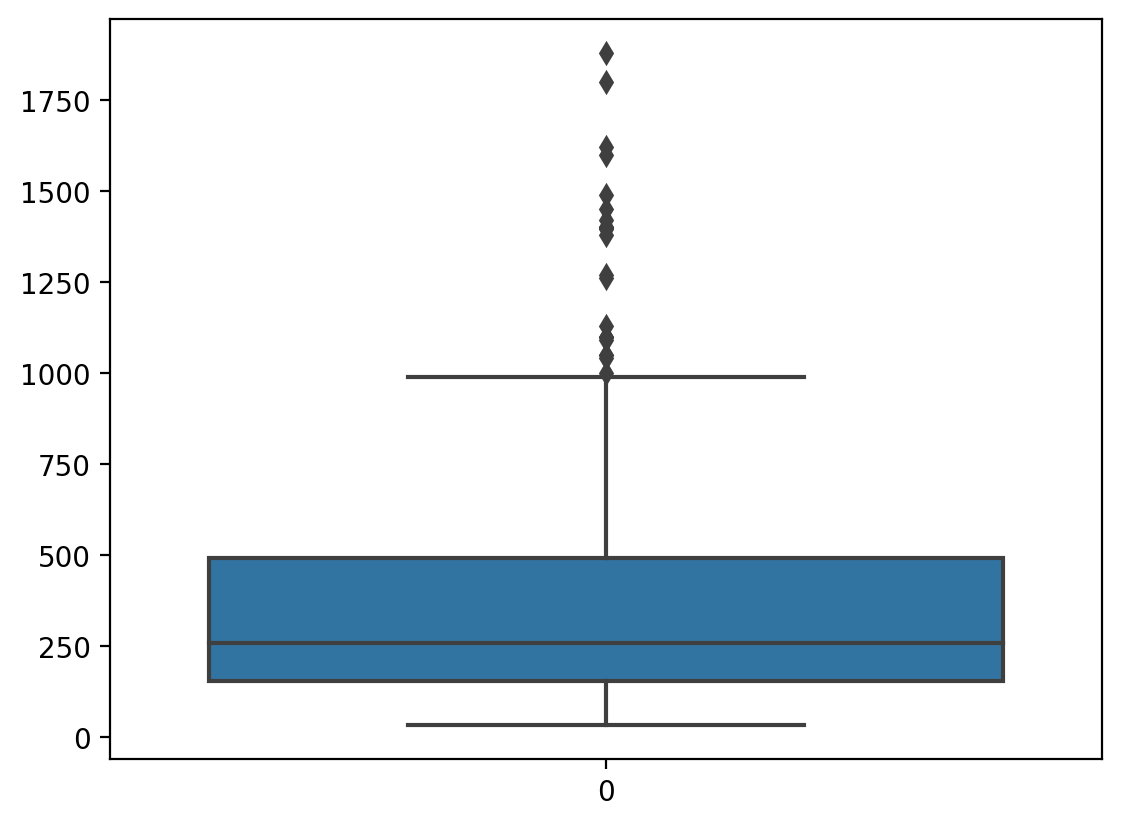

In [13]:
sns.boxplot(df['Price'])

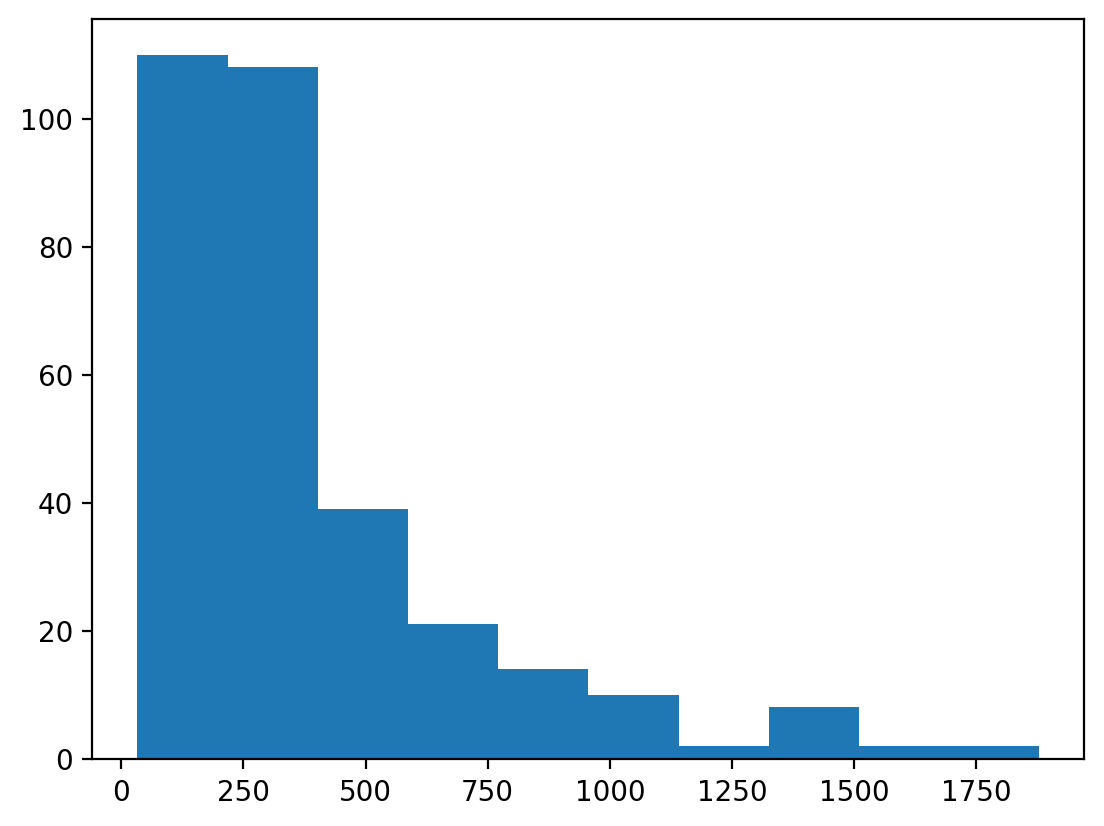

In [14]:
plt.hist(df['Price'])
plt.show()

In [15]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

336.25


In [16]:
print(df['Price'].skew())
df['Price'].describe()

1.927647700667977


count     316.000000
mean      385.025316
std       337.527348
min        33.000000
25%       155.000000
50%       257.000000
75%       491.250000
max      1879.000000
Name: Price, dtype: float64

In [17]:
print(df['Price'].quantile(0.5))
print(df['Price'].quantile(0.95))

257.0
1100.0


In [18]:
df['Price'] = np.where(df['Price'] > 1100, 257, df['Price'])
df['Price'].describe()

count     316.000000
mean      327.949367
std       233.971652
min        33.000000
25%       155.000000
50%       256.000000
75%       441.250000
max      1100.000000
Name: Price, dtype: float64

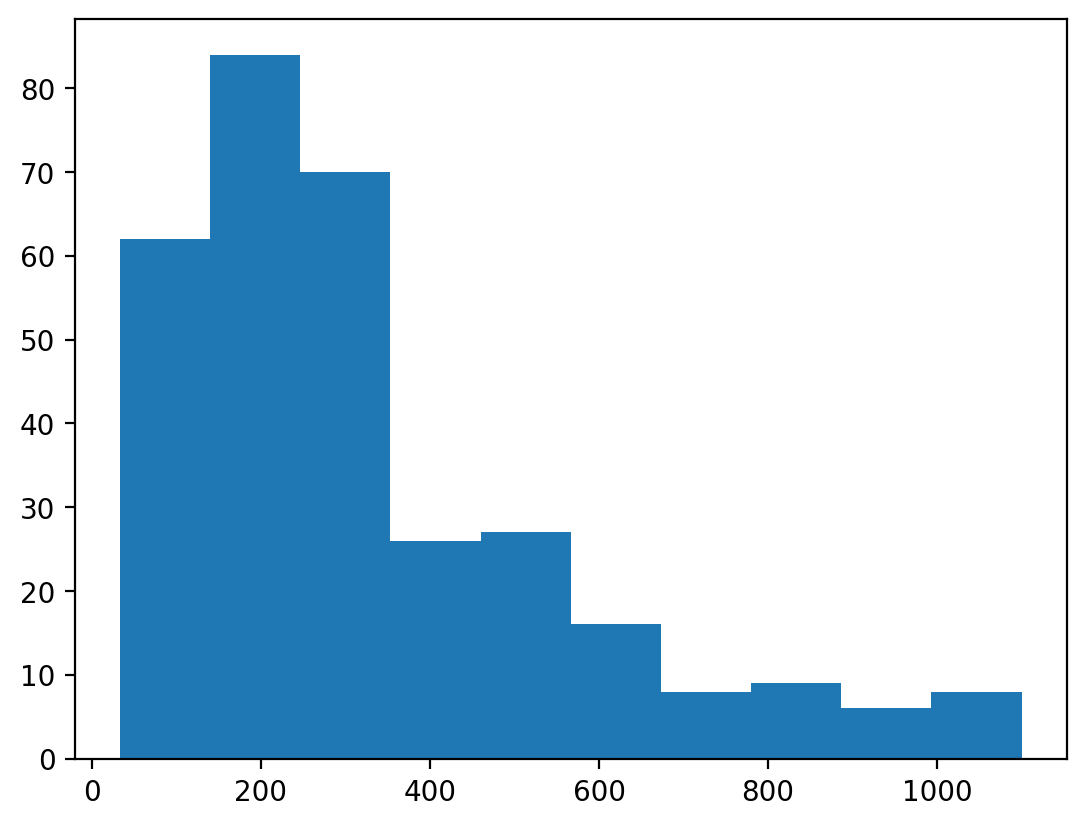

In [19]:
plt.hist(df['Price'])
plt.show()

### 2. Encode data

In [20]:
from sklearn.preprocessing import LabelEncoder

#Create an instance of LabelEncoder
le=LabelEncoder()

In [21]:
#Column with LabelEncoder
label_mapping = {'Phnom Penh':1,'Kandal':2,'Preah Sihanouk':3,'Siem Reap':4}
df['Shop Location'] = df['Shop Location'].map(label_mapping)

### 3. Target Encode

In [22]:
import pandas as pd

# Step 1: Prepare the dataset
# Load the 'data' dataset, assuming it contains the categorical variables and the target variable

# Create a new dataset to store the encoded data
data_target = df.copy()
# Step 2: Compute target statistics with regularization
# Calculate the target statistics for each categorical variable in the dataset with regularization
smoothing_factor = 0.5  # Smoothing factor for regularization
global_mean = df['Price'].mean()  # Overall mean of the target variable

# Define a function to apply target encoding with regularization
def target_encode(data, target, categorical_variable, smoothing):
    encoded_name = categorical_variable + '_encoded'
    agg = data.groupby(categorical_variable)[target].agg(['mean', 'count'])
    mean = agg['mean']
    count = agg['count']
    smooth_mean = (global_mean * smoothing + mean * count) / (smoothing + count)
    data[encoded_name] = data[categorical_variable].map(smooth_mean)
    
# Apply target encoding with regularization for each categorical variable
categorical_variables = ['Brand']
for variable in categorical_variables:
    target_encode(data_target , 'Price', variable, smoothing_factor)

# Step 3: Replace the original categorical variables with the encoded columns
for variable in categorical_variables:
    encoded_name = variable + '_encoded'
    data_target[variable] = data_target[encoded_name]
    data_target.drop(encoded_name, axis=1, inplace=True)
    
# Drop the 'Dua' column
data_target.drop(['Description','Title'], axis=1, inplace=True)

# Print the encoded dataset
data_target 


,Price,Shop Location,Brand
0,185.0,1,310.203048
1,290.0,1,591.275518
2,500.0,1,371.974043
3,135.0,1,194.585257
4,520.0,1,591.275518
...,...,...,...
311,100.0,1,276.969982
312,250.0,1,275.983122
313,330.0,1,281.688413
314,370.0,1,276.969982


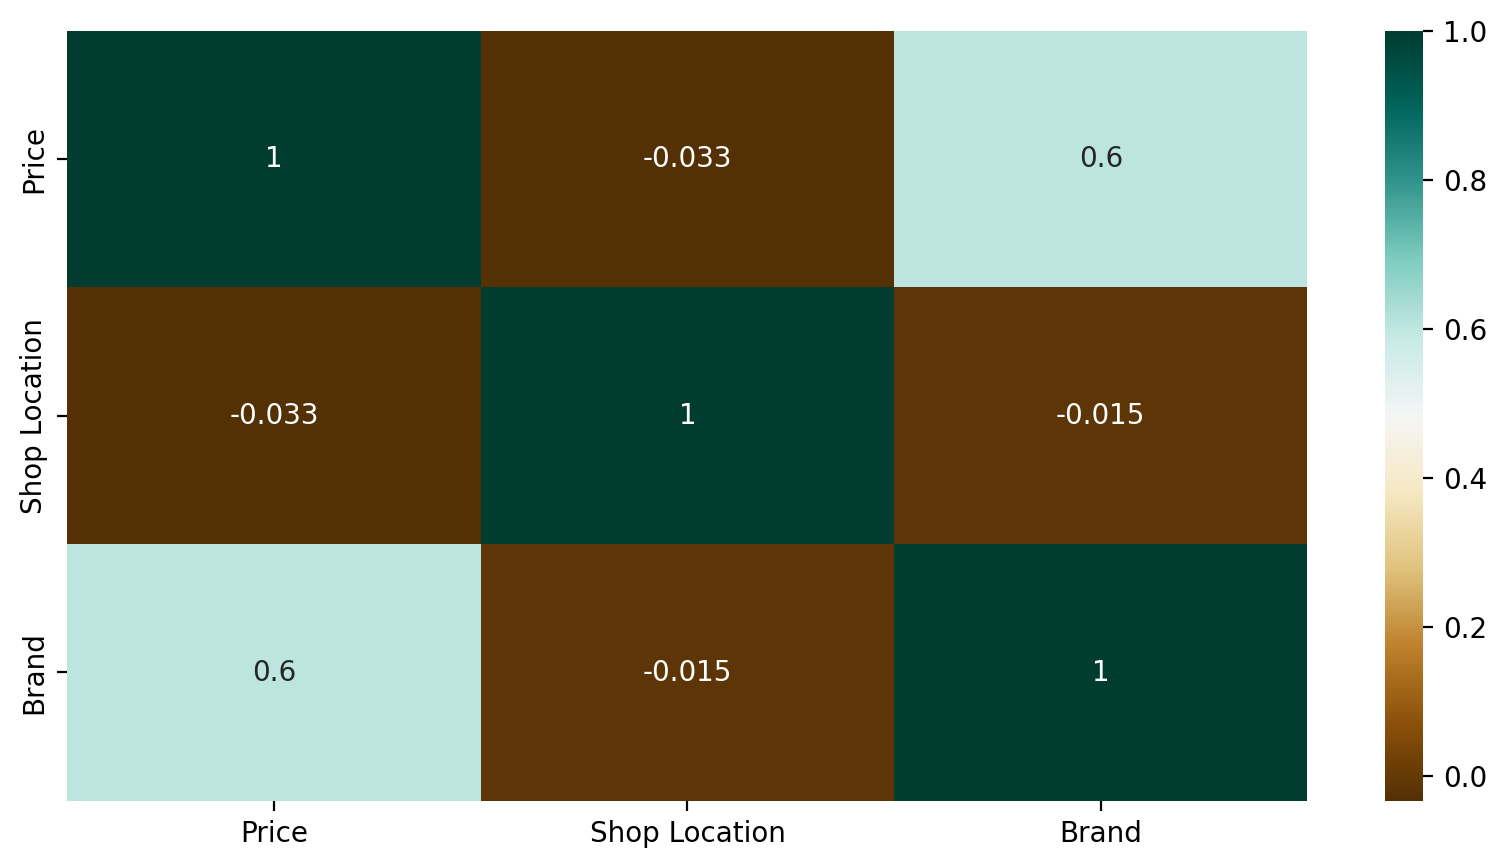

In [23]:
plt.figure(figsize=(10,5))
c= data_target.corr()
sns.heatmap(c,cmap="BrBG",annot=True);

### 4. Model Development 

#### Data Spliting

In [24]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = data_target.drop('Price', axis=1)
y = data_target['Price']

# Split the data into train and test sets with a 50% ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Check the shape of the original data and the split data
print("Original Data Shape:", data_target.shape)
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

Original Data Shape: (316, 3)
X_train Shape: (158, 2)
X_test Shape: (158, 2)
y_train Shape: (158,)
y_test Shape: (158,)


### Simple Linear Regression

In this section, we built linear regression of each selection feature

### Build Model

In [25]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def build_model1(X, y):
    num_features = X.shape[1]
    
    for i in range(num_features):
        feature = X.iloc[:, i]  # Accessing feature column by index
        feature_name = X.columns[i]  # Extracting feature name
        
        feature = sm.add_constant(feature)  # Adding the constant
        lm = sm.OLS(y, feature).fit()  # Fitting the model
        
        # Model Summary
        print(f"Summary for {feature_name}:")
        print(lm.summary())
        
        # Predicting the values
        y_pred = lm.predict(feature)
        
        # Plotting the actual vs. predicted values with linear line
        plt.scatter(y, y_pred)
        plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Linear line
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'Actual vs. Predicted Values ({feature_name})')
        
        # Adjusting y and x ranges
        plt.ylim(0, 1000)
        plt.xlim(0, 1000)
        
        plt.show()
        
        # Calculating R-squared
        r_squared = lm.rsquared
        print(f"R-squared for {feature_name}: {r_squared}")
        
        # Calculating Mean Squared Error (MSE)
        mse = mean_squared_error(y, y_pred)
        print(f"Mean Squared Error (MSE) for {feature_name}: {mse}\n")


Summary for Shop Location:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.4219
Date:                Tue, 18 Jul 2023   Prob (F-statistic):              0.517
Time:                        00:45:33   Log-Likelihood:                -1065.7
No. Observations:                 158   AIC:                             2135.
Df Residuals:                     156   BIC:                             2142.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           345

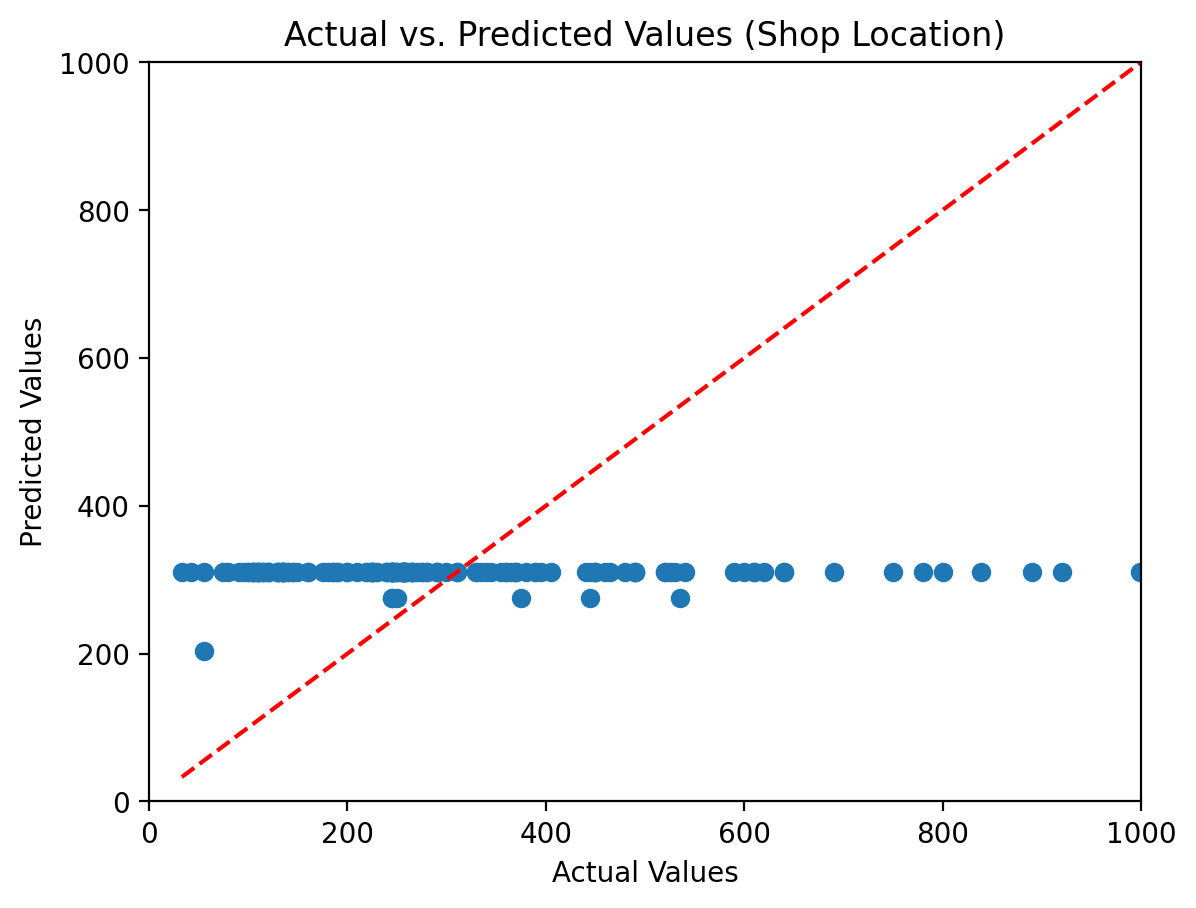

R-squared for Shop Location: 0.0026970789956693997
Mean Squared Error (MSE) for Shop Location: 42281.545376622365

Summary for Brand:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     102.4
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           8.11e-19
Time:                        00:45:33   Log-Likelihood:                -1026.1
No. Observations:                 158   AIC:                             2056.
Df Residuals:                     156   BIC:                             2062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.97

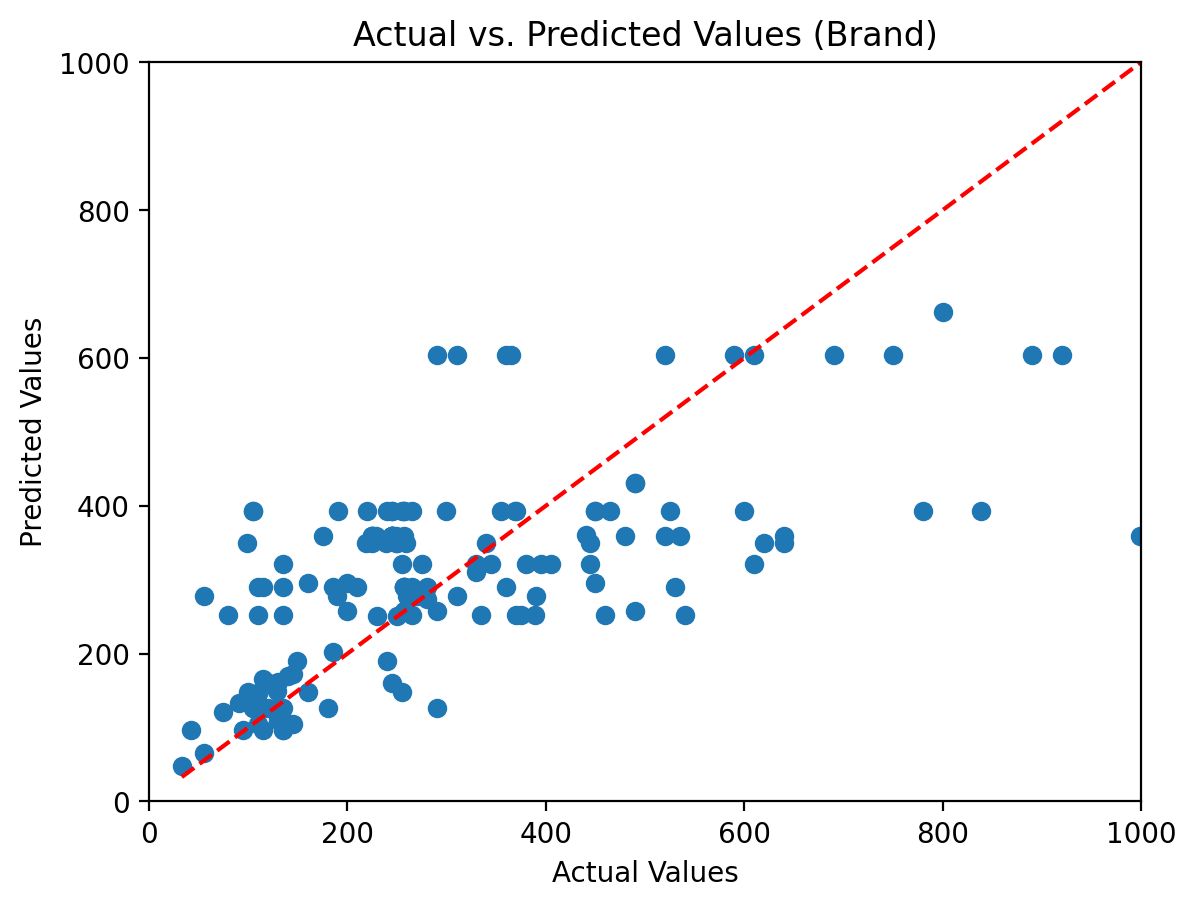

R-squared for Brand: 0.3962382723550809
Mean Squared Error (MSE) for Brand: 25597.01605844961



In [26]:
# Split the dataset into features (X) and target variable (y)
X = data_target.drop('Price', axis=1)
y = data_target['Price']

# Split the data into train and test sets with a 50% ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

build_model1(X_train,y_train)

### Model Evaluation

In [27]:
import pandas as pd
import statsmodels.api as sm
from IPython.display import display

def build_model1(X, y):
    num_features = X.shape[1]
    n = len(y)  # Number of observations
    
    results = []  # List to store feature names, R-squared, adjusted R-squared, and RMSE
    
    for i in range(num_features):
        feature = X.iloc[:, i]  # Accessing feature column by index
        feature_name = X.columns[i]  # Extracting feature name
        
        feature = sm.add_constant(feature)  # Adding the constant
        lm = sm.OLS(y, feature).fit()  # Fitting the model
        
        # Calculating R-squared
        r_squared = lm.rsquared
        
        # Calculating adjusted R-squared
        df_residuals = n - (i + 1)  # Degrees of freedom of the residuals
        adj_r_squared = 1 - (1 - r_squared) * (n - 1) / df_residuals
        
        # Predicting the values
        y_pred = lm.predict(feature)
        
        # Calculating RMSE
        rmse = np.sqrt(np.mean((y - y_pred)**2))
        
        # Store feature name, R-squared, adjusted R-squared, and RMSE in results list
        results.append({'Feature': feature_name, 'R-squared': r_squared, 'Adjusted R-squared': adj_r_squared, 'RMSE': rmse})
        
    # Create DataFrame from results list
    results_df = pd.DataFrame(results)
    
    return results_df

# Split the dataset into features (X) and target variable (y)
X = data_target.drop('Price', axis=1)
y = data_target['Price']

# Split the data into train and test sets with a 50% ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

results_df = build_model1(X_train, y_train)
display(results_df)


,Feature,R-squared,Adjusted R-squared,RMSE
0,Shop Location,0.002697,0.002697,205.624768
1,Brand,0.396238,0.392368,159.990675


**Base on the summary table, we found out that:**
* Predictor Variable **'Shop Location'(R-squared: 0.2003)** and **'Shop Location'(R-squared:0.004408)

**We can asume that these two variable have the most impact on Tour Price Prediction model**

### Multiple Linear Regression

In this section, we built a multiple linear regression of our selection feature

## Build Model

In [28]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def build_model(X, y):
    X = sm.add_constant(X) # Adding the constant
    lm = sm.OLS(y, X).fit() # Fitting the model
    
    # Model Summary
    print(lm.summary())
    
    # Predicting the values
    y_pred = lm.predict(X)
    
    # Plotting the actual vs. predicted values with linear line
    plt.scatter(y, y_pred)
    plt.plot([0, 2000], [0, 2000], color='red', linestyle='--')  # Linear line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    
    # Adjusting y and x ranges
    plt.ylim(-100, 2000)
    plt.xlim(-100, 2000)
    
    plt.show()
    
    # Calculating Mean Squared Error (MSE)
    mse = mean_squared_error(y, y_pred)
    print("Mean Squared Error (MSE):", mse)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     51.66
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           6.43e-18
Time:                        00:45:52   Log-Likelihood:                -1025.6
No. Observations:                 158   AIC:                             2057.
Df Residuals:                     155   BIC:                             2066.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -14.3085     58.513     -0.245

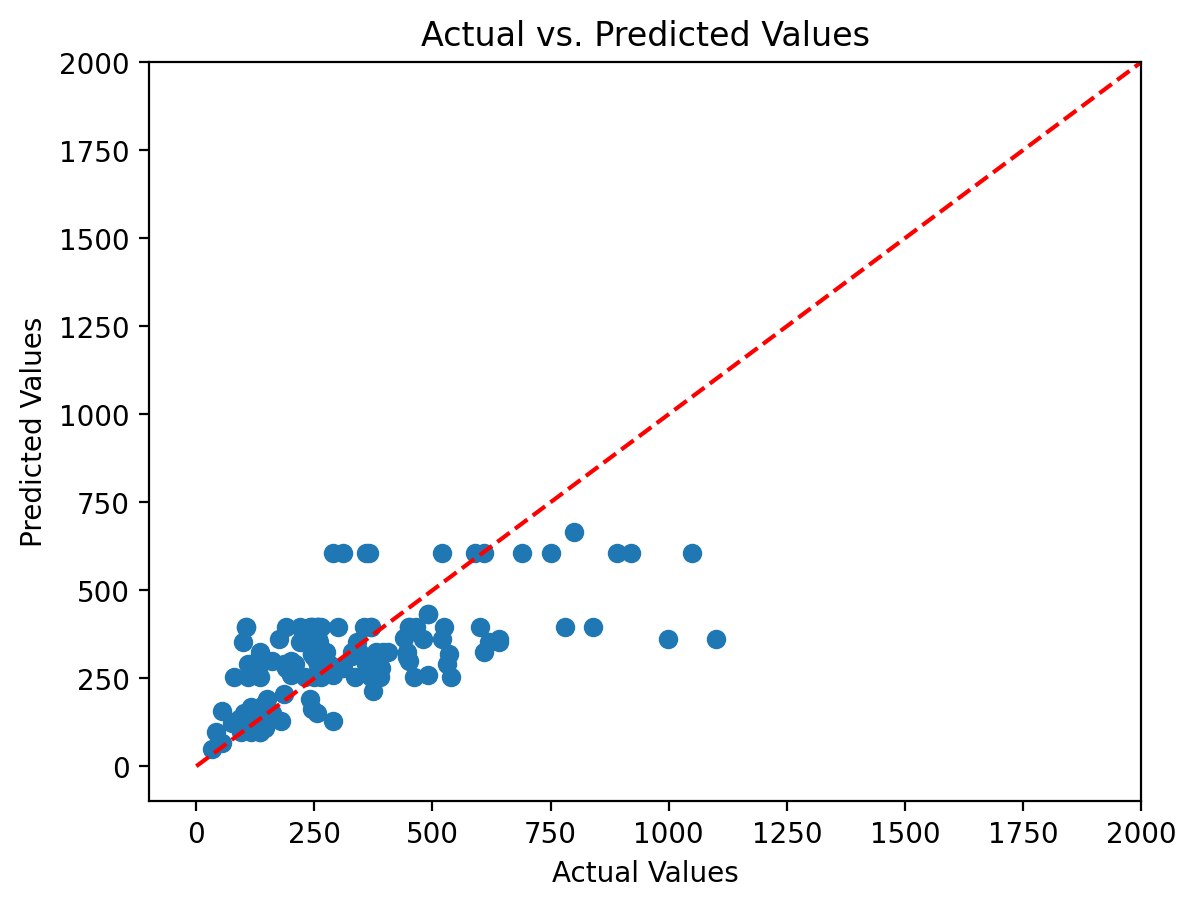

Mean Squared Error (MSE): 25438.882900428765


In [29]:
build_model(X_train,y_train)

## Model Evaluation

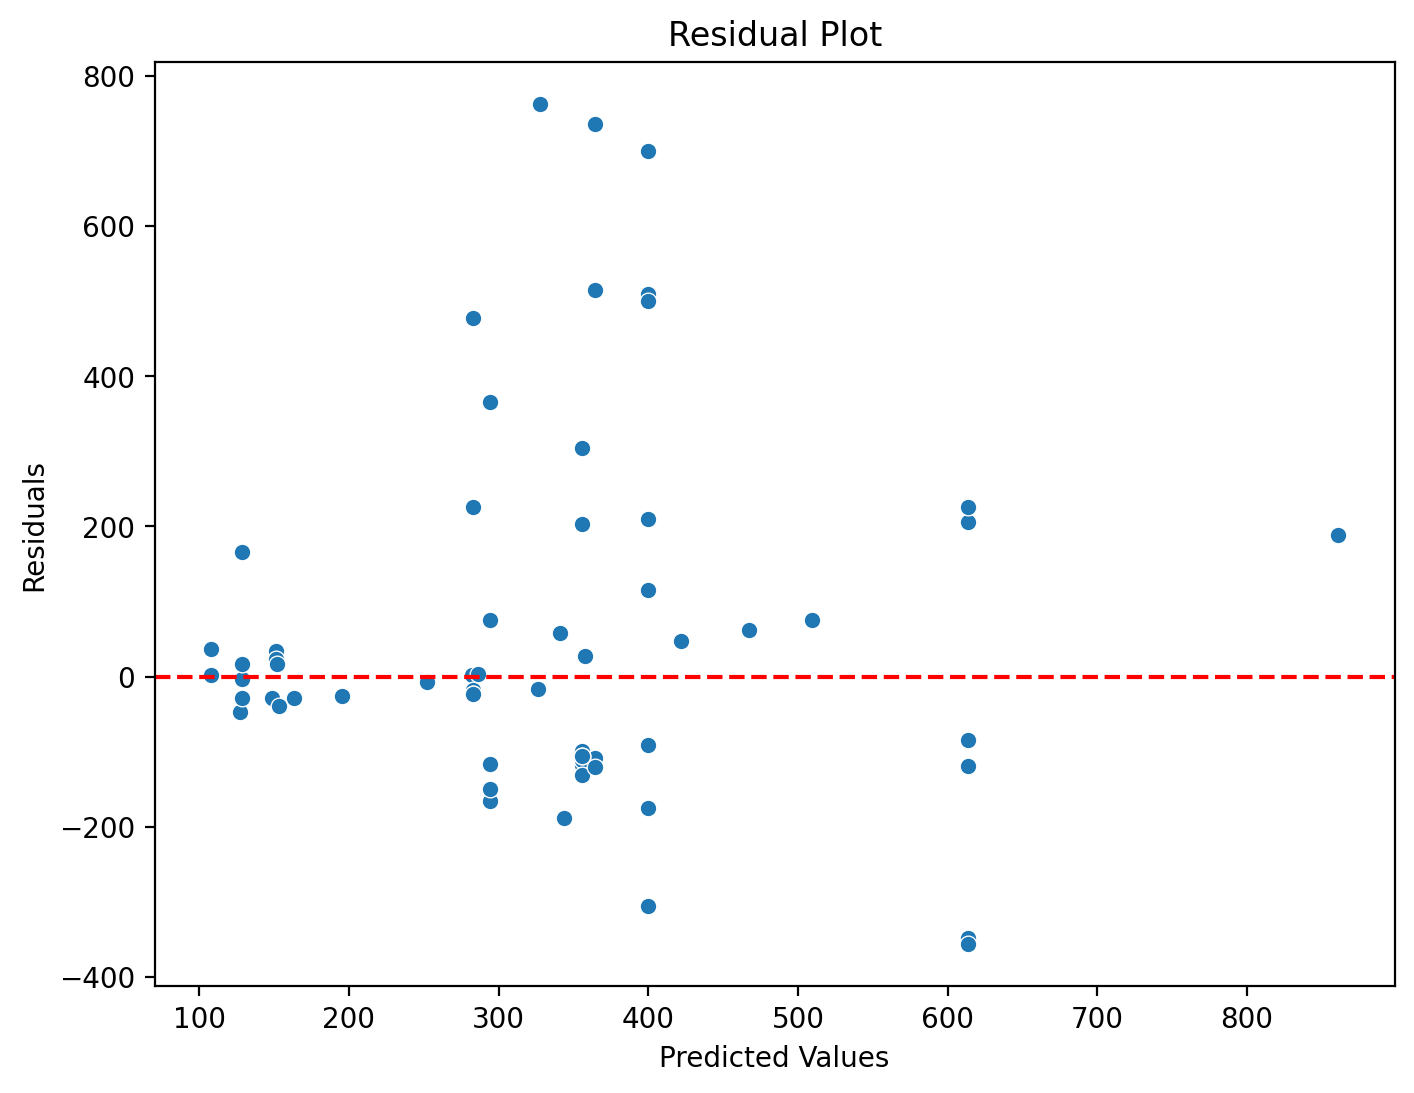

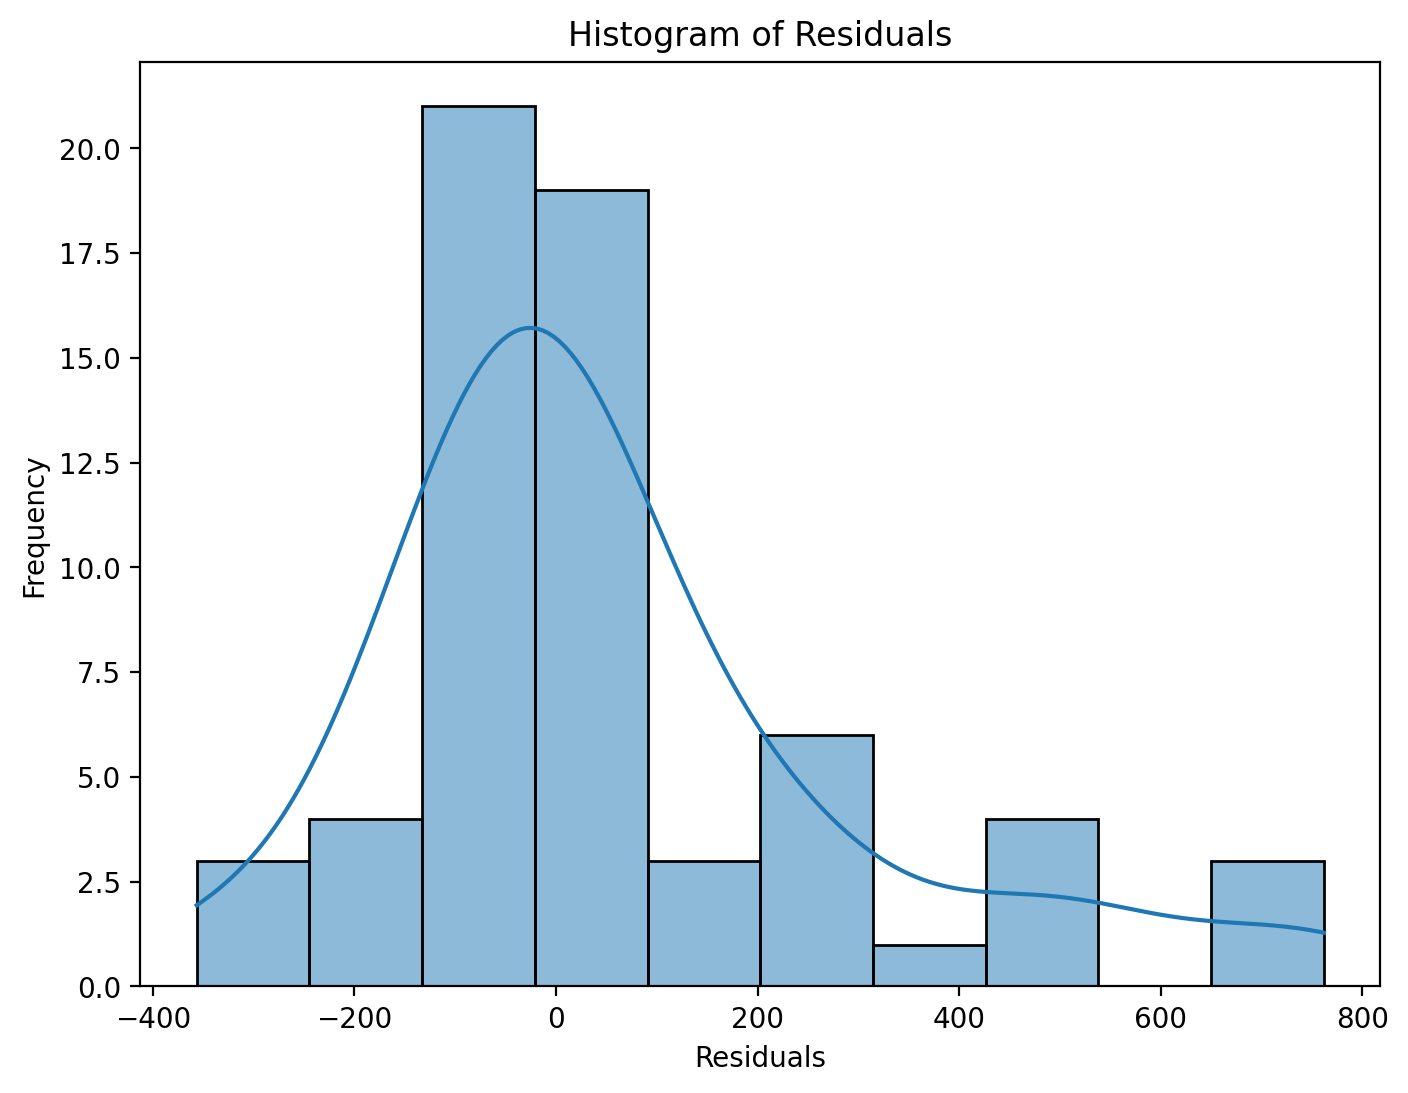

Mean Squared Error (MSE): 59199.737025931616


In [30]:
# model diagnostics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset and split it into features and target variables
X = data_target.drop(["Price"], axis=1)  # Your feature data
y = data_target['Price']  # Your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Residuals (difference between predicted and actual values)
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Cross-Validation MSE scores: [59199.73702593 36231.41557404 21227.43963394 16968.03826596
 42273.29216572]
Mean MSE: 35179.98453311867
Standard Deviation of MSE: 15196.825498912869


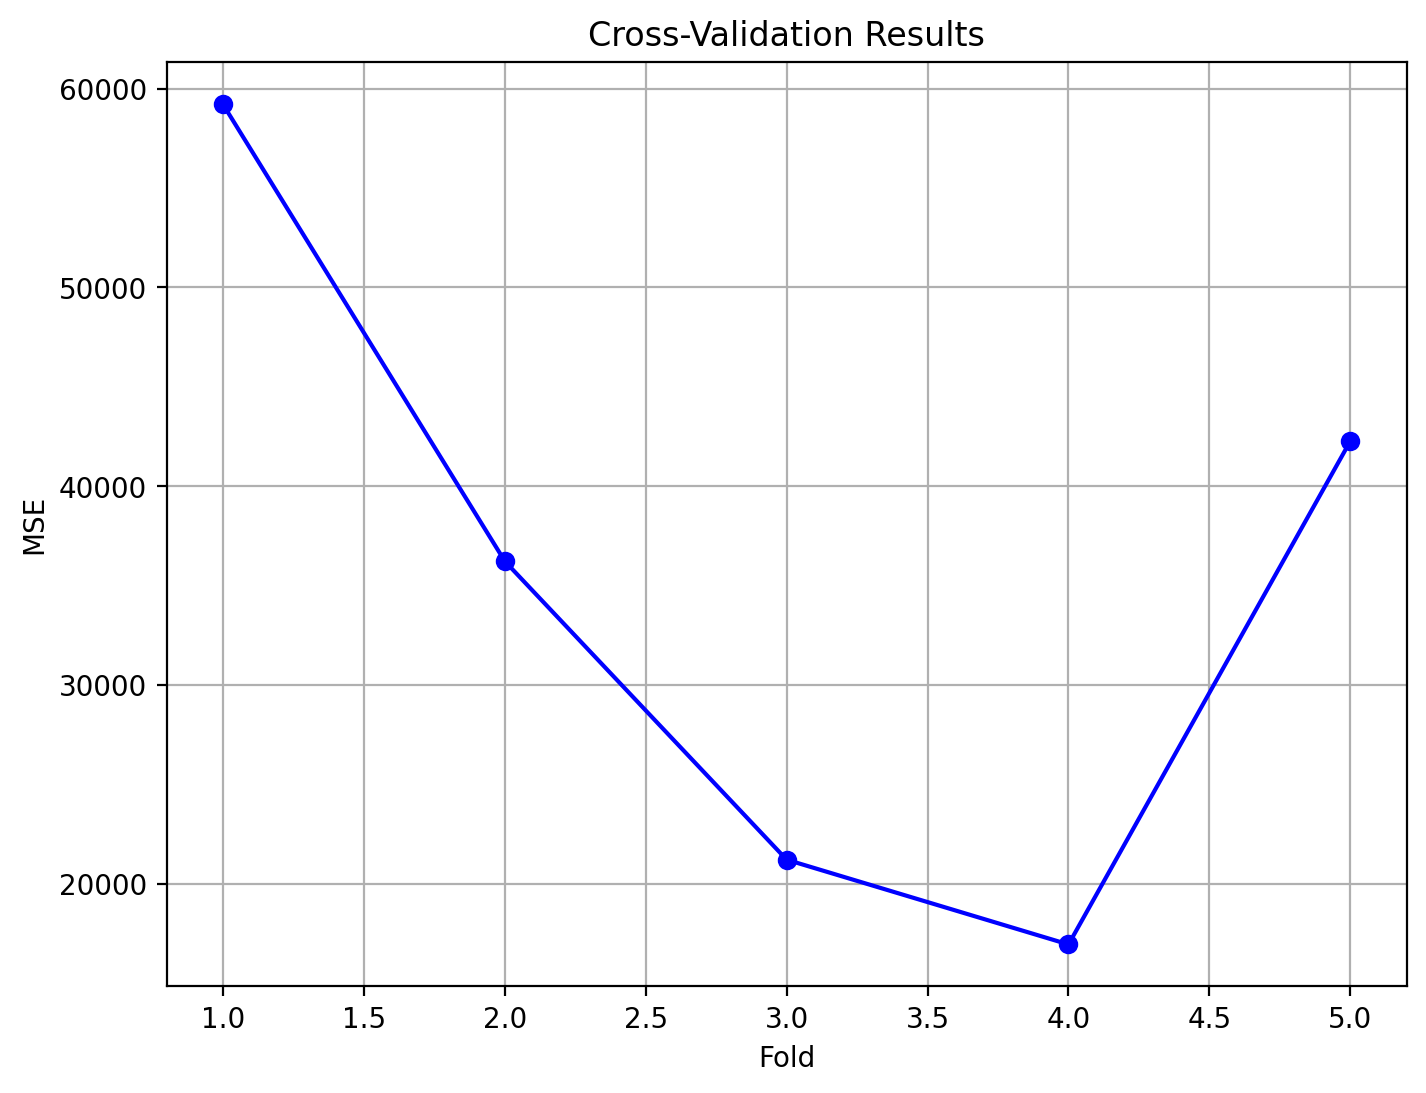

In [31]:
# model Evaluate
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

# Load your dataset and split it into features and target variables
X = data_target.drop(["Price"], axis=1)  # Your feature data
y = data_target['Price']  # Your target variable

# Create your Multiple Linear Regression model
model = LinearRegression()

# Perform cross-validation
num_folds = 5  # Number of folds for cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores = -scores  # Convert negative MSE scores to positive

# Print the evaluation results
print("Cross-Validation MSE scores:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))
print("Standard Deviation of MSE:", np.std(mse_scores))
# Plot the cross-validation results
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_folds + 1), mse_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.title('Cross-Validation Results')
plt.grid(True)
plt.show()